In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
df = pd.read_csv("AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
df = df2.set_index('Date')
data = df2.set_index('Date')

In [ ]:
data

,Price
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69
...,...
2023-12-22,193.60
2023-12-26,193.05
2023-12-27,193.15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7+ KB


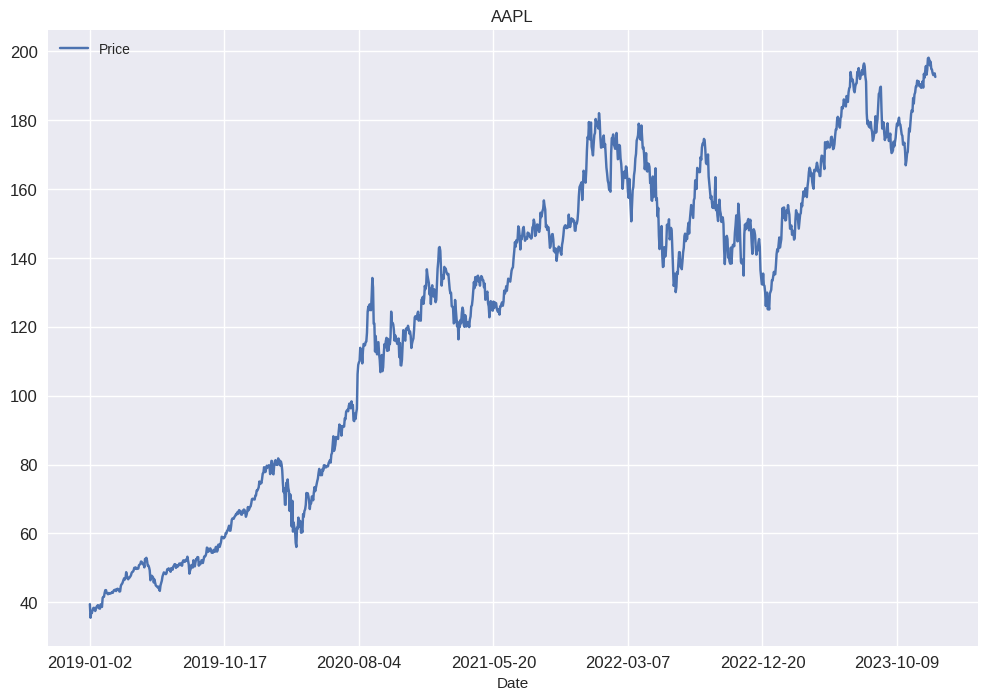

In [ ]:
data.plot(figsize = (12, 8), title = "AAPL", fontsize = 12)
plt.show()

In [ ]:
ema_s = 50 # EMA Short
ema_l = 200 # EMA Long

In [ ]:
data["EMA_S"] = data.Price.ewm(span = ema_s, min_periods = ema_s).mean()
data["EMA_L"] = data.Price.ewm(span = ema_l, min_periods = ema_l).mean()

In [ ]:
data["MACD"] = data.EMA_S - data.EMA_L

In [ ]:
data

,Price,EMA_S,EMA_L,MACD
Date,,,,
2019-01-02,39.48,NaN,NaN,NaN
2019-01-03,35.55,NaN,NaN,NaN
2019-01-04,37.07,NaN,NaN,NaN
2019-01-07,36.98,NaN,NaN,NaN
2019-01-08,37.69,NaN,NaN,NaN
...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,10.724743
2023-12-26,193.05,188.415396,177.656197,10.759198
2023-12-27,193.15,188.601066,177.810365,10.790701


In [ ]:
signal_mw = 9

In [ ]:
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean()

In [ ]:
data

,Price,EMA_S,EMA_L,MACD,MACD_Signal
Date,,,,,
2019-01-02,39.48,NaN,NaN,NaN,NaN
2019-01-03,35.55,NaN,NaN,NaN,NaN
2019-01-04,37.07,NaN,NaN,NaN,NaN
2019-01-07,36.98,NaN,NaN,NaN,NaN
2019-01-08,37.69,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,10.724743,10.131293
2023-12-26,193.05,188.415396,177.656197,10.759198,10.256874
2023-12-27,193.15,188.601066,177.810365,10.790701,10.363640


In [ ]:
data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)

In [ ]:
data["returns"] = np.log(data.Price.div(data.Price.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

,Price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy
Date,,,,,,,,
2019-10-28,62.26,56.238257,51.734250,4.504008,4.218638,1,0.009846,NaN
2019-10-29,60.82,56.417975,51.837415,4.580560,4.299730,1,-0.023400,-0.023400
2019-10-30,60.82,56.590643,51.939266,4.651376,4.376668,1,0.000000,0.000000
2019-10-31,62.19,56.810273,52.055335,4.754937,4.457905,1,0.022276,0.022276
2019-11-01,63.96,57.090712,52.189947,4.900765,4.551629,1,0.028064,0.028064
...,...,...,...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,10.724743,10.131293,1,-0.005563,-0.005563
2023-12-26,193.05,188.415396,177.656197,10.759198,10.256874,1,-0.002845,-0.002845
2023-12-27,193.15,188.601066,177.810365,10.790701,10.363640,1,0.000518,0.000518


In [ ]:
data.dropna(inplace = True)

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

,Price,EMA_S,EMA_L,MACD,MACD_Signal,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,,,
2019-10-29,60.82,56.417975,51.837415,4.580560,4.299730,1,-0.023400,-0.023400,0.976871,0.976871
2019-10-30,60.82,56.590643,51.939266,4.651376,4.376668,1,0.000000,0.000000,0.976871,0.976871
2019-10-31,62.19,56.810273,52.055335,4.754937,4.457905,1,0.022276,0.022276,0.998876,0.998876
2019-11-01,63.96,57.090712,52.189947,4.900765,4.551629,1,0.028064,0.028064,1.027305,1.027305
2019-11-04,64.38,57.376624,52.327599,5.049025,4.655685,1,0.006545,0.006545,1.034051,1.034051
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.60,188.226228,177.501485,10.724743,10.131293,1,-0.005563,-0.005563,3.109541,1.865939
2023-12-26,193.05,188.415396,177.656197,10.759198,10.256874,1,-0.002845,-0.002845,3.100707,1.860638
2023-12-27,193.15,188.601066,177.810365,10.790701,10.363640,1,0.000518,0.000518,3.102313,1.861602


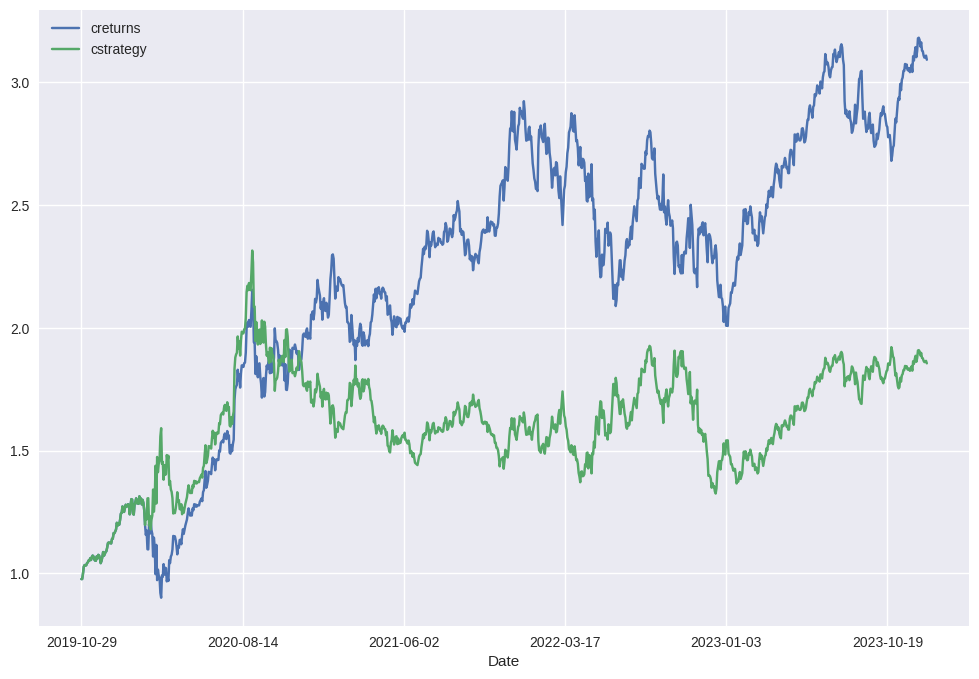

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
def run_strategy(EMA):
    signal_mw = 9
    data = df.copy()
    data["EMA_S"] = data.Price.ewm(span = int(EMA[0]), min_periods = int(EMA[0])).mean()
    data["EMA_L"] = data.Price.ewm(span = int(EMA[1]), min_periods = int(EMA[1])).mean()
    data["MACD"] = data.EMA_S - data.EMA_L
    data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean()
    data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)
    data["returns"] = np.log(data.Price.div(data.Price.shift(1)))
    data.dropna(inplace = True)

    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)


    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [ ]:
-run_strategy((50, 200))

<ipython-input-91-318ab9539fa1>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


1.8556261506168779

## Optimize the parameters

In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy, ((10, 50, 1), (100, 250, 1)))

Streaming output truncated to the last 5000 lines.
<ipython-input-91-318ab9539fa1>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-91-318ab9539fa1>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
<ipython-input-91-318ab9539fa1>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["

array([ 30., 160.])

In [ ]:
-run_strategy((30, 160))

<ipython-input-91-318ab9539fa1>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]


4.5783159762627115

----------

## Return (01/01/2024 - 30/09/2024)

In [ ]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data1 = df2.set_index('Date')
data1

,Price
Date,
2024-01-02,185.64
2024-01-03,184.25
2024-01-04,181.91
2024-01-05,181.18
2024-01-08,185.56
...,...
2024-09-24,227.37
2024-09-25,226.37
2024-09-26,227.52


In [ ]:
# ema_s = 50 # EMA Short
# ema_l = 200 # EMA Long
ema_s_o = 30 # EMA Short
ema_l_o = 160 # EMA Long

In [ ]:
# data1["EMA_S"] = data1.Price.ewm(span = ema_s, min_periods = ema_s).mean()
# data1["EMA_L"] = data1.Price.ewm(span = ema_l, min_periods = ema_l).mean()
data1["EMA_S_o"] = data1.Price.ewm(span = ema_s_o, min_periods = ema_s_o).mean()
data1["EMA_L_o"] = data1.Price.ewm(span = ema_l_o, min_periods = ema_l_o).mean()

In [ ]:
# data1["MACD"] = data1.EMA_S - data1.EMA_L
data1["MACD_o"] = data1.EMA_S_o - data1.EMA_L_o

In [ ]:
signal_mw = 9

In [ ]:
# data1["MACD_Signal"] = data1.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean()
data1["MACD_Signal_o"] = data1.MACD_o.ewm(span = signal_mw, min_periods = signal_mw).mean()

In [ ]:
# data1["position"] = np.where(data1.MACD - data1.MACD_Signal > 0, 1, -1)
data1["position_o"] = np.where(data1.MACD_o - data1.MACD_Signal_o > 0, 1, -1)

In [ ]:
# data1["returns"] = np.log(data1.Price.div(data1.Price.shift(1)))
data1["returns_o"] = np.log(data1.Price.div(data1.Price.shift(1)))

In [ ]:
data1.dropna(inplace = True)

In [ ]:
# data1["strategy"] = data1.position.shift(1) * data1["returns"]
data1["strategy_o"] = data1.position_o.shift(1) * data1["returns_o"]

In [ ]:
data1.dropna(inplace = True)

In [ ]:
# data1["creturns"] = data1["returns"].cumsum().apply(np.exp)
# data1["cstrategy"] = data1["strategy"].cumsum().apply(np.exp)

data1["creturns_o"] = data1["returns_o"].cumsum().apply(np.exp)
data1["cstrategy_o"] = data1["strategy_o"].cumsum().apply(np.exp)

In [ ]:
data1

,Price,EMA_S_o,EMA_L_o,MACD_o,MACD_Signal_o,position_o,returns_o,strategy_o,creturns_o,cstrategy_o
Date,,,,,,,,,,
2024-09-03,222.77,222.652496,204.676526,17.975970,17.996520,-1,-0.027582,-0.027582,0.972795,0.972795
2024-09-04,220.85,222.536205,204.904688,17.631517,17.916660,-1,-0.008656,0.008656,0.964410,0.981252
2024-09-05,222.38,222.526127,205.150801,17.375326,17.800404,-1,0.006904,-0.006904,0.971092,0.974501
2024-09-06,220.82,222.416053,205.371111,17.044942,17.640522,-1,-0.007040,0.007040,0.964279,0.981385
2024-09-09,220.91,222.318887,205.589232,16.729655,17.449968,-1,0.000407,-0.000407,0.964672,0.980985
2024-09-10,220.11,222.176377,205.792733,16.383644,17.228926,-1,-0.003628,0.003628,0.961179,0.984551
2024-09-11,222.66,222.207579,206.028743,16.178836,17.012825,-1,0.011519,-0.011519,0.972314,0.973275
2024-09-12,222.77,222.243864,206.262623,15.981241,16.801756,-1,0.000494,-0.000494,0.972795,0.972795
2024-09-13,222.50,222.260389,206.489113,15.771277,16.591879,-1,-0.001213,0.001213,0.971616,0.973975


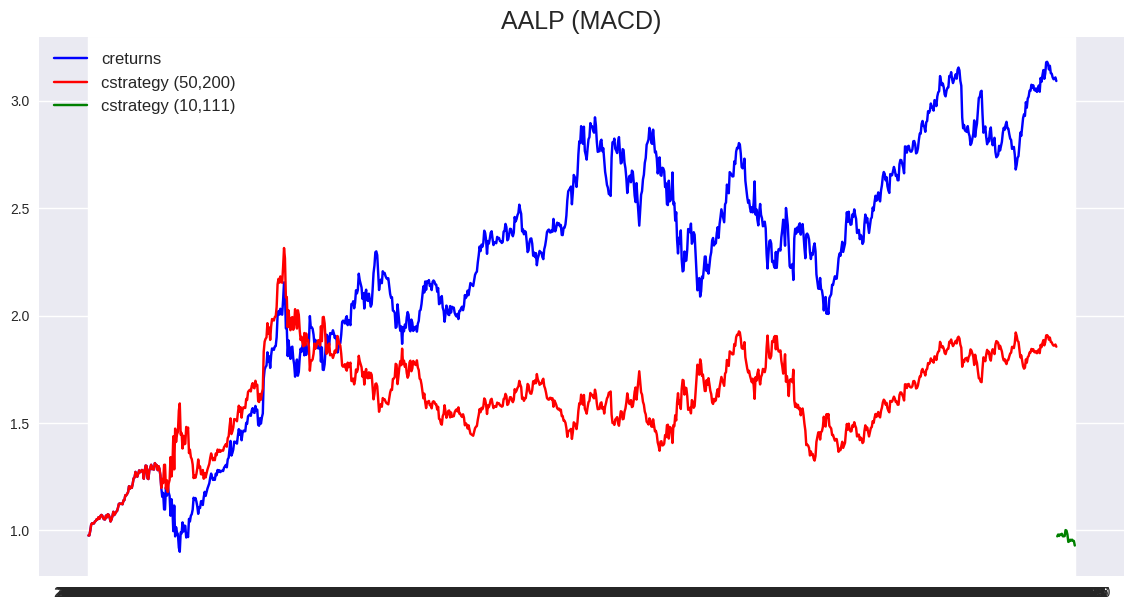

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data["creturns"], label="creturns", linestyle='-', color='b')
plt.plot(data["cstrategy"], label="cstrategy (50,200)", linestyle='-', color='r')

plt.plot(data1["cstrategy_o"], label="cstrategy (10,111)", linestyle='-', color='g')
plt.title("AALP (MACD)", fontsize=18)
plt.legend(loc="best", fontsize=12)

plt.show()